# You can check Table of Contents to see contents headings

# Download dataset

To download Kaggle dataset, we'll need Kaggle APIs key as "kaggle.json".

In [ ]:
from google.colab import drive, files
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# upload "kaggle.json" to connect to Kaggle with Kaggle APIs key
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kuangkulchotirat","key":"f519cb192d5ccac2be24ecc26aa9c3f1"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!pwd

/content


In [ ]:
!kaggle datasets download -d shayanfazeli/heartbeat

 96% 95.0M/98.8M [00:01<00:00, 94.4MB/s]
100% 98.8M/98.8M [00:01<00:00, 91.7MB/s]


In [ ]:
!unzip heartbeat.zip

Archive:  heartbeat.zip
  inflating: mitbih_test.csv         
  inflating: mitbih_train.csv        
  inflating: ptbdb_abnormal.csv      
  inflating: ptbdb_normal.csv        


# Import Neccessary Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

# Construct Dataset

### Data Comprehension and Initial Exploration
According to Kachuee M et al 2018, building an MI classification model was trained from the PTB dataset. In this module, PTB dataset was splitted by labeling as "ptbdb_abnormal.csv" and "ptbdb_normal.csv".

In the article, they discussed that it was only Lead II used for model development.

Since, the Lead II represents only inferior wall, abnormal Lead II could be interpreted only as inferior-wall MI. This could make the model prediction misdiagnosis for anterior-wall or lateral-wall MI. Note that this model may be suitable for only diagnosis of inferior-wall MI.

In [ ]:
ptbdb_normal = pd.read_csv('ptbdb_normal.csv', header=None)
ptbdb_normal

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,1.000000,0.929586,0.503550,0.293491,0.169822,0.159763,0.130769,0.125444,0.137278,0.111243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4042,1.000000,0.637579,0.154837,0.061983,0.088965,0.083374,0.065143,0.057365,0.060039,0.060039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4043,1.000000,0.872574,0.465071,0.232212,0.126132,0.155886,0.174644,0.190168,0.203752,0.168823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4044,0.915983,0.529373,0.288406,0.144536,0.171802,0.180669,0.177566,0.176458,0.178896,0.180448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


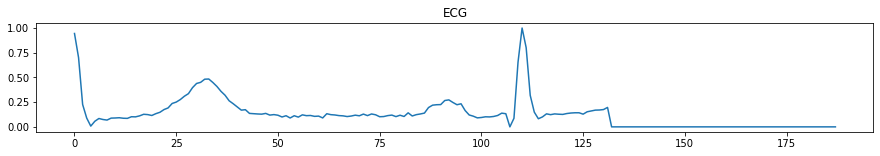

In [ ]:
# try plot 1 sample from normal dataset
x = ptbdb_normal.columns
y = ptbdb_normal.iloc[79,:].values
plt.figure(figsize=(15,2))
plt.plot(x, y)
plt.title('ECG')
plt.show()

Looks like padding area (~130 - 188) cuts off some T-wave. What I see here is that the normal P-QRS-T wave form was not quite complete?.

In [ ]:
ptbdb_abnormal = pd.read_csv('ptbdb_abnormal.csv', header=None)

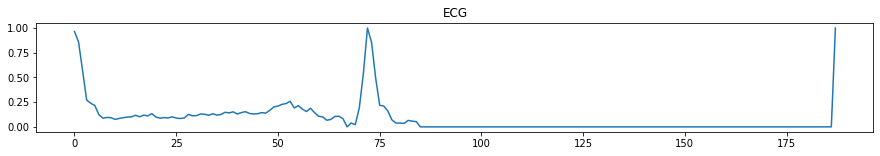

In [ ]:
# try plot 1 sample from abnormal dataset
x = ptbdb_abnormal.columns
y = ptbdb_abnormal.iloc[405,:].values
plt.figure(figsize=(15,2))
plt.plot(x, y)
plt.title('ECG')
plt.show()

This sample show elevation of ST interval. Sign of STEMI.

### Label data and Concatenate two Datasets

In [ ]:
# Check dimension before create labels
print("## SHAPE OF NORMAL DATASET ##")
print(ptbdb_normal.shape)
print("## SHAPE OF ABNORMAL DATASET ##")
print(ptbdb_abnormal.shape)
print("## Ratio Normal/Abnormal ##")
print(ptbdb_normal.shape[0]/ptbdb_abnormal.shape[0])

## SHAPE OF NORMAL DATASET ##
(4046, 188)
## SHAPE OF ABNORMAL DATASET ##
(10506, 188)
## Ratio Normal/Abnormal ##
0.3851132686084142


In [ ]:
# Label 0 as normal and concat to ptbdb_normal dataframe in axis 1
norm_label = pd.DataFrame(np.zeros(ptbdb_normal.shape[0]))
norm_df = pd.concat([ptbdb_normal, norm_label], axis=1)

# Label 1 as abnormal and concat to ptbdb_abnormal dataframe in axis 1
abnorm_label = pd.DataFrame(np.ones(ptbdb_abnormal.shape[0]))
abnorm_df = pd.concat([ptbdb_abnormal, abnorm_label], axis=1)

# Concat 2 dataframe in axis 0
df = pd.concat([norm_df, abnorm_df], axis=0)
df.columns = np.array([*range(188), "Label"])
df = df.reset_index()
df.iloc[:, -1].value_counts()

1.0    10506
0.0     4046
Name: Label, dtype: int64

In [ ]:
df

,index,0,1,2,3,4,5,6,7,8,...,179,180,181,182,183,184,185,186,187,Label
0,0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14547,10501,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14548,10502,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14549,10503,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14550,10504,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


Text(0.5, 1.0, 'Compare Dataset Size')

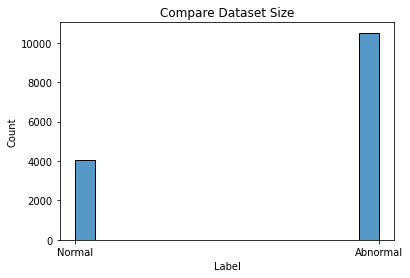

In [ ]:
# Checking balance dataset
plt.figure(figsize=(6,4))
plot = sns.histplot(data=df, x="Label")
plot.set_xticks(range(2))
plot.set_xticklabels(["Normal", "Abnormal"])
plt.title("Compare Dataset Size")

Keep reminded that this imbalanced dataset needed to be stratified the data when split train-test

### Further Exploration to check if Linear Classifier possibly fit this dataset?

Separate Features from Target

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, [-1]].values

In [ ]:
y = y.reshape((1,len(y)))[0]
y

array([0., 0., 0., ..., 1., 1., 1.])

Explore data points in different dimension using PCA to check characteristic of distribution

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
pd.DataFrame(X_pca, index=None)

,0,1,2,3,4
0,-4354.439338,-0.774066,0.066378,0.067898,-0.516227
1,-4353.439302,0.980848,0.764776,0.605780,-0.536200
2,-4352.439367,-0.824642,0.788057,0.617797,0.580119
3,-4351.439379,-1.634203,-0.006727,0.488002,0.018436
4,-4350.439364,-1.248962,0.083017,0.485455,0.142739
...,...,...,...,...,...
14547,6146.560710,-0.797475,0.032958,0.673817,-0.230822
14548,6147.560829,0.867906,-1.165725,0.673207,0.452882
14549,6148.560669,-1.519717,1.124673,0.352074,1.127494
14550,6149.560756,-0.168951,0.540968,-0.395326,-0.220435


In [ ]:
df_plot = pd.concat([pd.DataFrame(X_pca), pd.DataFrame(y)], axis=1)
df_plot.columns = ['pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'target']
df_plot

,pca_1,pca_2,pca_3,pca_4,pca_5,target
0,-4354.439338,-0.774066,0.066378,0.067898,-0.516227,0.0
1,-4353.439302,0.980848,0.764776,0.605780,-0.536200,0.0
2,-4352.439367,-0.824642,0.788057,0.617797,0.580119,0.0
3,-4351.439379,-1.634203,-0.006727,0.488002,0.018436,0.0
4,-4350.439364,-1.248962,0.083017,0.485455,0.142739,0.0
...,...,...,...,...,...,...
14547,6146.560710,-0.797475,0.032958,0.673817,-0.230822,1.0
14548,6147.560829,0.867906,-1.165725,0.673207,0.452882,1.0
14549,6148.560669,-1.519717,1.124673,0.352074,1.127494,1.0
14550,6149.560756,-0.168951,0.540968,-0.395326,-0.220435,1.0


Text(0.5, 1.0, 'Exploration in Different Dimension')

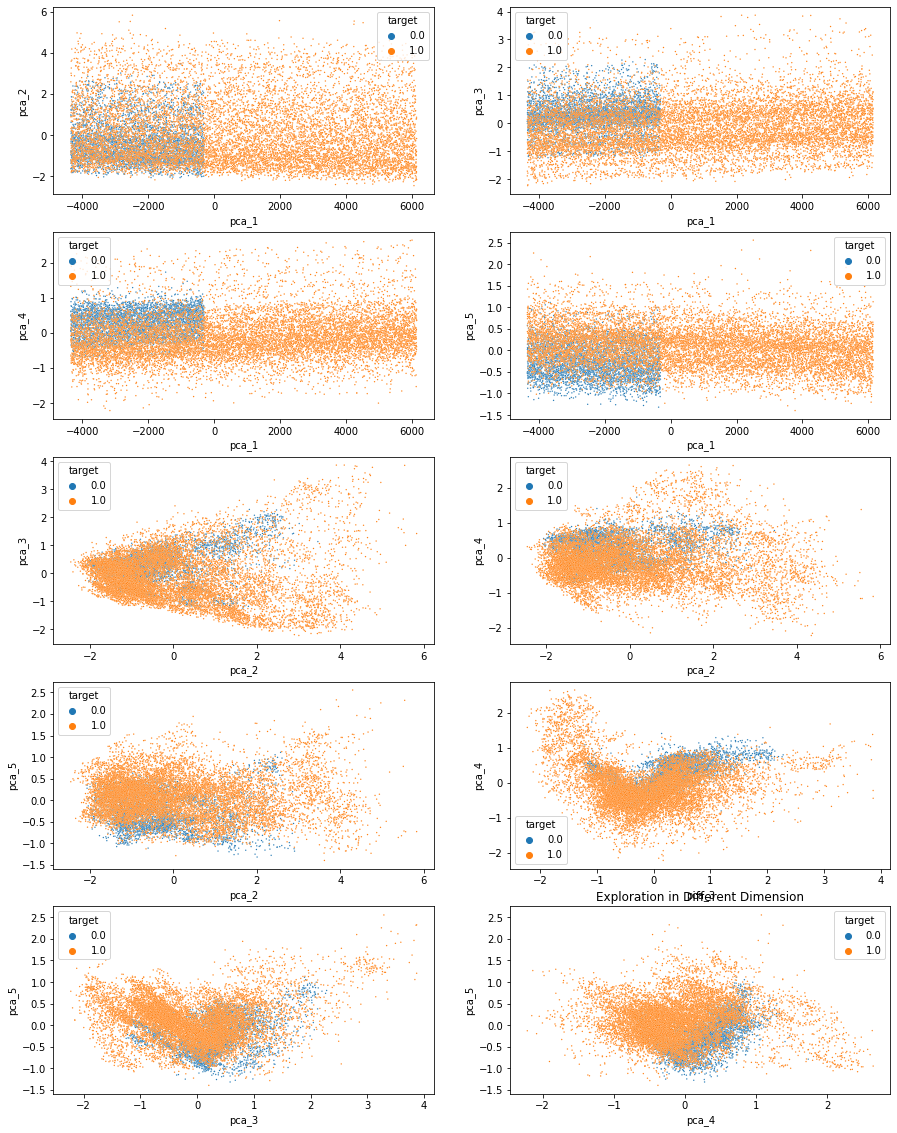

In [ ]:
plt.figure(figsize=(15,20))
plt.subplot(5, 2, 1)
sns.scatterplot(data=df_plot, x='pca_1', y='pca_2', hue='target', s=2)

plt.subplot(5, 2, 2)
sns.scatterplot(data=df_plot, x='pca_1', y='pca_3', hue='target', s=2)

plt.subplot(5, 2, 3)
sns.scatterplot(data=df_plot, x='pca_1', y='pca_4', hue='target', s=2)

plt.subplot(5, 2, 4)
sns.scatterplot(data=df_plot, x='pca_1', y='pca_5', hue='target', s=2)

plt.subplot(5, 2, 5)
sns.scatterplot(data=df_plot, x='pca_2', y='pca_3', hue='target', s=2)

plt.subplot(5, 2, 6)
sns.scatterplot(data=df_plot, x='pca_2', y='pca_4', hue='target', s=2)

plt.subplot(5, 2, 7)
sns.scatterplot(data=df_plot, x='pca_2', y='pca_5', hue='target', s=2)

plt.subplot(5, 2, 8)
sns.scatterplot(data=df_plot, x='pca_3', y='pca_4', hue='target', s=2)

plt.subplot(5, 2, 9)
sns.scatterplot(data=df_plot, x='pca_3', y='pca_5', hue='target', s=2)

plt.subplot(5, 2, 10)
sns.scatterplot(data=df_plot, x='pca_4', y='pca_5', hue='target', s=2)

plt.title("Exploration in Different Dimension")

From the scatter plot, it has been suspected that "Linear Model" may provide better accuracy. However, I will run all machine learning models to compare each model before selection.

### Prepare data for training and validation.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=df['Label'])

In [ ]:
X_train.shape

(11641, 189)

In [ ]:
X_test.shape

(2911, 189)

Now, standardize the data.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# Prepare Utilities

Prepare utilities, so complete model report will be easily executed.

In [ ]:
def cross_validate(model):
    accuracies = cross_val_score(estimator=model, X=X_train_sc, y=y_train, cv=10)
    for idx, f in enumerate(accuracies):
      print(f'Accuracy of fold {idx}', round(f, 3))
    print("Mean Accuracy of Cross Validation: {:.2f}%".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

def report_classification_metrics(y_test, y_pred):
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    return f1, precision, recall

def store_model_summary(model_name, accuracy, auc, f1, precision, recall):
    model_collection['Model'].append(model_name)
    model_collection['Accuracy'].append(accuracy)
    model_collection['F1 Score'].append(f1)
    model_collection['Precision'].append(precision)
    model_collection['Recall'].append(recall)
    model_collection['AUC'].append(auc)

model_collection = {'Model': [],'Accuracy': [],'F1 Score': [],'Precision': [],'Recall': [],'AUC': []}

def create_complete_report(model, model_name, X_test=X_test_sc, y_test=y_test):
    #print cross validation
    print('CROSS VALIDATION')
    print('-'*99)
    cross_validate(model)
    print('-'*99)
    print('')
    
    #classsification report
    y_pred = model.predict(X_test)
    print('CLASSIFICATION REPORT')
    print('-'*99)
    f1, precision, recall = report_classification_metrics(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print('-'*99)
    print('')
    
    #plot Confusion Matrix and ROC
    
    #define metrics
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    
    #ROC curve
    fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(15, 6))
    ax1.plot(fpr,tpr,label="AUC="+str(round(auc,3)))
    ax1.set_title(f'ROC Curve of {model_name}')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_xlabel('False Positive Rate')
    ax1.legend(loc=4)
    
    #Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ax2 = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    ax2.set_title(f'Confusion Matrix of {model_name}')
    
    plt.show()
    
    #store model result
    print('')
    print('-'*99)
    print('MODEL RESULT SUMMARY')
    if model_name not in model_collection['Model']:
        store_model_summary(model_name, accuracy, auc, f1, precision, recall)
    display(pd.DataFrame(model_collection))

To test the model, I am going to start with simple library like scikit-learn. If the accuracy doesn't satisfy due to complex data, more complex neural network may be applied later on.

Import Model Libraries

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, precision_score, recall_score

# Model Development and Selection

## Logistic Regression

In [ ]:
#declare model
lr = LogisticRegression(random_state=0)

#training
lr.fit(X_train_sc, y_train)

#predict
y_pred = lr.predict(X_test_sc)

#accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', round(accuracy*100,3),'%')

Accuracy:  100.0 %


CROSS VALIDATION
---------------------------------------------------------------------------------------------------
Accuracy of fold 0 1.0
Accuracy of fold 1 1.0
Accuracy of fold 2 1.0
Accuracy of fold 3 1.0
Accuracy of fold 4 1.0
Accuracy of fold 5 1.0
Accuracy of fold 6 1.0
Accuracy of fold 7 1.0
Accuracy of fold 8 1.0
Accuracy of fold 9 1.0
Mean Accuracy of Cross Validation: 100.00%
Standard Deviation: 0.00%
---------------------------------------------------------------------------------------------------

CLASSIFICATION REPORT
---------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       809
         1.0       1.00      1.00      1.00      2102

    accuracy                           1.00      2911
   macro avg       1.00      1.00      1.00      2911
weighted avg       1.00      1.00      1.00      2911

----------------------------------

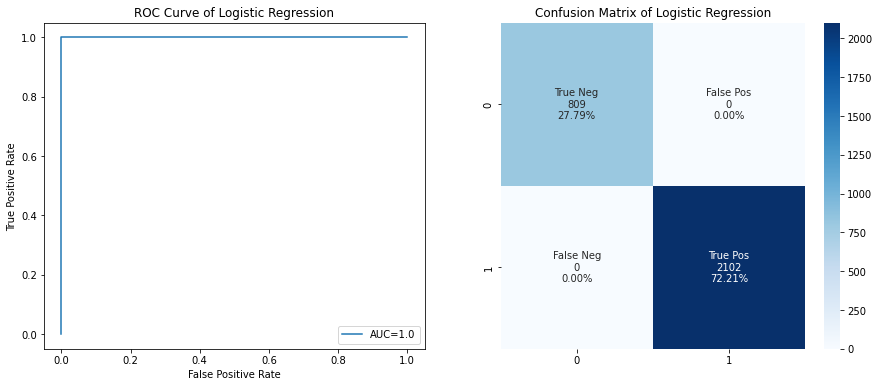


---------------------------------------------------------------------------------------------------
MODEL RESULT SUMMARY


,Model,Accuracy,F1 Score,Precision,Recall,AUC
0,Logistic Regression,1.0,1.0,1.0,1.0,1.0


In [ ]:
create_complete_report(lr, 'Logistic Regression')

## KNN

First, test for K selection

In [ ]:
for n in range(2,10):
    knn = KNeighborsClassifier(n_neighbors=n, metric='minkowski', p=2)
    knn.fit(X_train_sc, y_train)
    y_pred = knn.predict(X_test_sc)
    cm_knn = confusion_matrix(y_test, y_pred)
    print('KNN for n = ', n)
    print(cm_knn)
    print('Accuracy: ',(accuracy_score(y_test, y_pred)))
    print('')

KNN for n =  2
[[ 799   10]
 [  87 2015]]
Accuracy:  0.9666781174854002

KNN for n =  3
[[ 793   16]
 [  51 2051]]
Accuracy:  0.9769838543455857

KNN for n =  4
[[ 799   10]
 [  72 2030]]
Accuracy:  0.971830985915493

KNN for n =  5
[[ 788   21]
 [  55 2047]]
Accuracy:  0.9738921332875301

KNN for n =  6
[[ 794   15]
 [  75 2027]]
Accuracy:  0.9690827894194435

KNN for n =  7
[[ 787   22]
 [  55 2047]]
Accuracy:  0.9735486087255238

KNN for n =  8
[[ 790   19]
 [  78 2024]]
Accuracy:  0.9666781174854002

KNN for n =  9
[[ 782   27]
 [  59 2043]]
Accuracy:  0.9704568876674682



K that gives the best accuracy is 3. So...

In [ ]:
#define final Model
knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
knn.fit(X_train_sc, y_train)
y_pred = knn.predict(X_test_sc)
accuracy = (accuracy_score(y_test, y_pred))
print('Accuracy: ',round(accuracy*100, 3),'%')

Accuracy:  97.698 %


CROSS VALIDATION
---------------------------------------------------------------------------------------------------
Accuracy of fold 0 0.976
Accuracy of fold 1 0.979
Accuracy of fold 2 0.972
Accuracy of fold 3 0.972
Accuracy of fold 4 0.971
Accuracy of fold 5 0.975
Accuracy of fold 6 0.966
Accuracy of fold 7 0.974
Accuracy of fold 8 0.969
Accuracy of fold 9 0.975
Mean Accuracy of Cross Validation: 97.29%
Standard Deviation: 0.34%
---------------------------------------------------------------------------------------------------

CLASSIFICATION REPORT
---------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       809
         1.0       0.99      0.98      0.98      2102

    accuracy                           0.98      2911
   macro avg       0.97      0.98      0.97      2911
weighted avg       0.98      0.98      0.98      2911

---------------

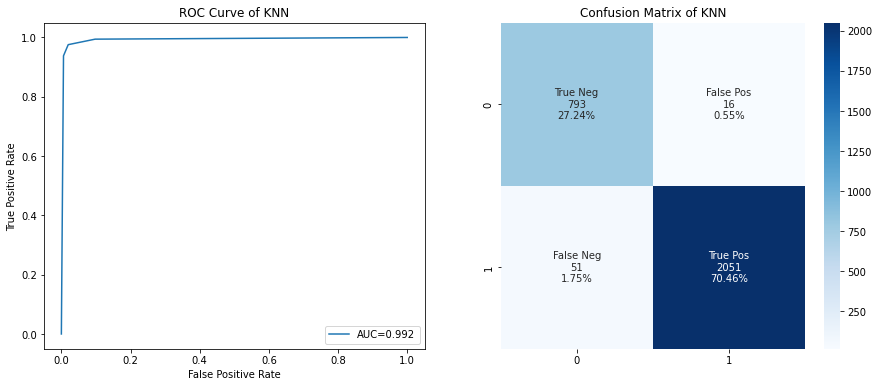


---------------------------------------------------------------------------------------------------
MODEL RESULT SUMMARY


,Model,Accuracy,F1 Score,Precision,Recall,AUC
0,Logistic Regression,1.000000,1.000000,1.000000,1.000000,1.000000
1,KNN,0.976984,0.983929,0.992259,0.975737,0.992391


In [ ]:
create_complete_report(knn, 'KNN')

## SVM

Start with choosing the right Kernel.

In [ ]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

for k in kernel:
    svm = SVC(kernel = k, random_state = 1)
    svm.fit(X_train_sc, y_train)
    y_pred = svm.predict(X_test_sc)
    cm_svm = confusion_matrix(y_test, y_pred)
    print('svm for kernel = ', k)
    print(cm_svm)
    print('Accuracy: ',(accuracy_score(y_test, y_pred)))
    print('')

svm for kernel =  linear
[[ 809    0]
 [   0 2102]]
Accuracy:  1.0

svm for kernel =  poly
[[ 708  101]
 [   0 2102]]
Accuracy:  0.9653040192373755

svm for kernel =  rbf
[[ 808    1]
 [   1 2101]]
Accuracy:  0.9993129508759876

svm for kernel =  sigmoid
[[ 526  283]
 [ 288 1814]]
Accuracy:  0.8038474750944693



The kernel that gives us best accuracy is 'linear'.

In [ ]:
#define Final Model for SVM
svm = SVC(kernel = 'linear', random_state = 1, probability=True)
svm.fit(X_train_sc, y_train)
y_pred = svm.predict(X_test_sc)
accuracy = (accuracy_score(y_test, y_pred))
print('Accuracy: ',round(accuracy*100,3),'%')
print('')

Accuracy:  100.0 %



CROSS VALIDATION
---------------------------------------------------------------------------------------------------
Accuracy of fold 0 1.0
Accuracy of fold 1 1.0
Accuracy of fold 2 1.0
Accuracy of fold 3 1.0
Accuracy of fold 4 1.0
Accuracy of fold 5 1.0
Accuracy of fold 6 1.0
Accuracy of fold 7 1.0
Accuracy of fold 8 1.0
Accuracy of fold 9 1.0
Mean Accuracy of Cross Validation: 100.00%
Standard Deviation: 0.00%
---------------------------------------------------------------------------------------------------

CLASSIFICATION REPORT
---------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       809
         1.0       1.00      1.00      1.00      2102

    accuracy                           1.00      2911
   macro avg       1.00      1.00      1.00      2911
weighted avg       1.00      1.00      1.00      2911

----------------------------------

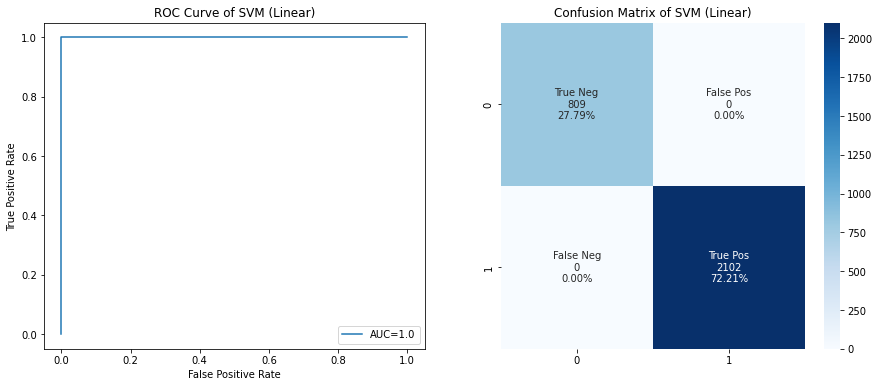


---------------------------------------------------------------------------------------------------
MODEL RESULT SUMMARY


,Model,Accuracy,F1 Score,Precision,Recall,AUC
0,Logistic Regression,1.000000,1.000000,1.000000,1.000000,1.000000
1,KNN,0.976984,0.983929,0.992259,0.975737,0.992391
2,SVM (Linear),1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
create_complete_report(svm, "SVM (Linear)")

## Naive Bayes

In [ ]:
nb = GaussianNB()
nb.fit(X_train_sc, y_train)
y_pred = nb.predict(X_test_sc)
accuracy = (accuracy_score(y_test, y_pred))
print('Accuracy: ',round(accuracy*100,3),'%')

Accuracy:  100.0 %


CROSS VALIDATION
---------------------------------------------------------------------------------------------------
Accuracy of fold 0 1.0
Accuracy of fold 1 1.0
Accuracy of fold 2 1.0
Accuracy of fold 3 1.0
Accuracy of fold 4 1.0
Accuracy of fold 5 1.0
Accuracy of fold 6 1.0
Accuracy of fold 7 1.0
Accuracy of fold 8 1.0
Accuracy of fold 9 1.0
Mean Accuracy of Cross Validation: 100.00%
Standard Deviation: 0.00%
---------------------------------------------------------------------------------------------------

CLASSIFICATION REPORT
---------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       809
         1.0       1.00      1.00      1.00      2102

    accuracy                           1.00      2911
   macro avg       1.00      1.00      1.00      2911
weighted avg       1.00      1.00      1.00      2911

----------------------------------

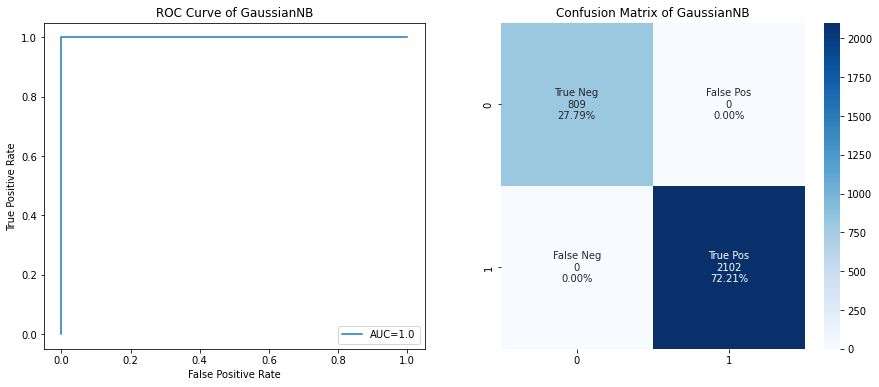


---------------------------------------------------------------------------------------------------
MODEL RESULT SUMMARY


,Model,Accuracy,F1 Score,Precision,Recall,AUC
0,Logistic Regression,1.000000,1.000000,1.000000,1.000000,1.000000
1,KNN,0.976984,0.983929,0.992259,0.975737,0.992391
2,SVM (Linear),1.000000,1.000000,1.000000,1.000000,1.000000
3,GaussianNB,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
create_complete_report(nb, "GaussianNB")

## Decision Tree Classifier

In [ ]:
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train_sc, y_train)
y_pred = tree.predict(X_test_sc)
accuracy = (accuracy_score(y_test, y_pred))
print('Accuracy: ',round(accuracy*100,3),'%')

Accuracy:  100.0 %


CROSS VALIDATION
---------------------------------------------------------------------------------------------------
Accuracy of fold 0 1.0
Accuracy of fold 1 1.0
Accuracy of fold 2 1.0
Accuracy of fold 3 1.0
Accuracy of fold 4 1.0
Accuracy of fold 5 1.0
Accuracy of fold 6 1.0
Accuracy of fold 7 1.0
Accuracy of fold 8 1.0
Accuracy of fold 9 1.0
Mean Accuracy of Cross Validation: 100.00%
Standard Deviation: 0.00%
---------------------------------------------------------------------------------------------------

CLASSIFICATION REPORT
---------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       809
         1.0       1.00      1.00      1.00      2102

    accuracy                           1.00      2911
   macro avg       1.00      1.00      1.00      2911
weighted avg       1.00      1.00      1.00      2911

----------------------------------

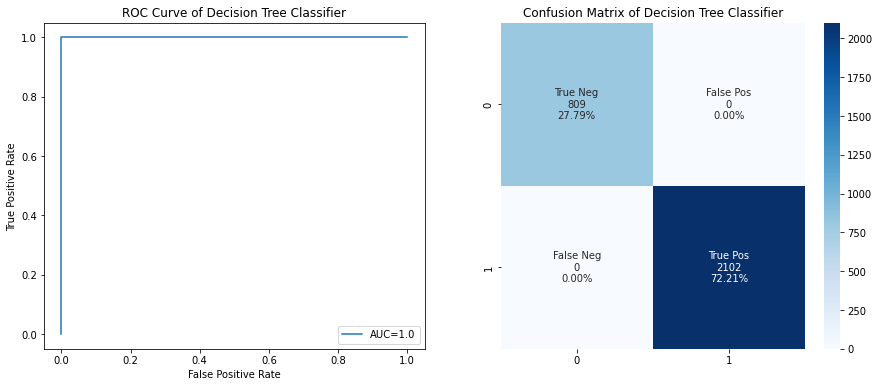


---------------------------------------------------------------------------------------------------
MODEL RESULT SUMMARY


,Model,Accuracy,F1 Score,Precision,Recall,AUC
0,Logistic Regression,1.000000,1.000000,1.000000,1.000000,1.000000
1,KNN,0.976984,0.983929,0.992259,0.975737,0.992391
2,SVM (Linear),1.000000,1.000000,1.000000,1.000000,1.000000
3,GaussianNB,1.000000,1.000000,1.000000,1.000000,1.000000
4,Decision Tree Classifier,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
create_complete_report(tree, "Decision Tree Classifier")

## Random Forest Classifier

First, test the best number of forest depth

In [ ]:
#test for number of trees depth
for t in range(2,15):
    forest = RandomForestClassifier(n_estimators = t, criterion = 'entropy', random_state = 0)
    forest.fit(X_train_sc, y_train)
    y_pred = forest.predict(X_test_sc)
    cm_forest = confusion_matrix(y_test, y_pred)
    print('forest depth = ', t)
    print(cm_forest)
    print('Accuracy: ',(accuracy_score(y_test, y_pred)))
    print('')

forest depth =  2
[[ 807    2]
 [  75 2027]]
Accuracy:  0.9735486087255238

forest depth =  3
[[ 797   12]
 [   7 2095]]
Accuracy:  0.9934730333218825

forest depth =  4
[[ 805    4]
 [  24 2078]]
Accuracy:  0.9903813122638269

forest depth =  5
[[ 803    6]
 [   3 2099]]
Accuracy:  0.9969082789419443

forest depth =  6
[[ 807    2]
 [   3 2099]]
Accuracy:  0.998282377189969

forest depth =  7
[[ 806    3]
 [   1 2101]]
Accuracy:  0.9986259017519753

forest depth =  8
[[ 806    3]
 [   3 2099]]
Accuracy:  0.9979388526279629

forest depth =  9
[[ 806    3]
 [   2 2100]]
Accuracy:  0.998282377189969

forest depth =  10
[[ 806    3]
 [   2 2100]]
Accuracy:  0.998282377189969

forest depth =  11
[[ 805    4]
 [   0 2102]]
Accuracy:  0.9986259017519753

forest depth =  12
[[ 807    2]
 [   1 2101]]
Accuracy:  0.9989694263139814

forest depth =  13
[[ 807    2]
 [   0 2102]]
Accuracy:  0.9993129508759876

forest depth =  14
[[ 807    2]
 [   0 2102]]
Accuracy:  0.9993129508759876



Depth 13 gives the best accuracy, so...

In [ ]:
forest = RandomForestClassifier(n_estimators = 9, criterion = 'entropy', random_state = 0)
forest.fit(X_train_sc, y_train)
y_pred = forest.predict(X_test_sc)
accuracy = (accuracy_score(y_test, y_pred))
print('forest depth = ', 13)
print('Accuracy: ',round(accuracy*100,3),'%')

forest depth =  13
Accuracy:  99.828 %


CROSS VALIDATION
---------------------------------------------------------------------------------------------------
Accuracy of fold 0 0.998
Accuracy of fold 1 0.995
Accuracy of fold 2 0.997
Accuracy of fold 3 0.996
Accuracy of fold 4 0.997
Accuracy of fold 5 0.997
Accuracy of fold 6 0.996
Accuracy of fold 7 0.992
Accuracy of fold 8 0.999
Accuracy of fold 9 0.997
Mean Accuracy of Cross Validation: 99.66%
Standard Deviation: 0.19%
---------------------------------------------------------------------------------------------------

CLASSIFICATION REPORT
---------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       809
         1.0       1.00      1.00      1.00      2102

    accuracy                           1.00      2911
   macro avg       1.00      1.00      1.00      2911
weighted avg       1.00      1.00      1.00      2911

---------------

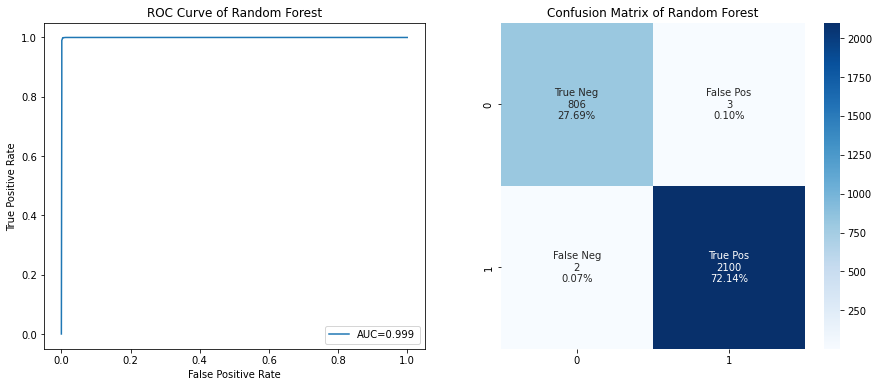


---------------------------------------------------------------------------------------------------
MODEL RESULT SUMMARY


,Model,Accuracy,F1 Score,Precision,Recall,AUC
0,Logistic Regression,1.000000,1.000000,1.000000,1.000000,1.000000
1,KNN,0.976984,0.983929,0.992259,0.975737,0.992391
2,SVM (Linear),1.000000,1.000000,1.000000,1.000000,1.000000
3,GaussianNB,1.000000,1.000000,1.000000,1.000000,1.000000
4,Decision Tree Classifier,1.000000,1.000000,1.000000,1.000000,1.000000
5,Random Forest,0.998282,0.998811,0.998573,0.999049,0.999261


In [ ]:
create_complete_report(forest, "Random Forest")

## XGBoost Classifier

In [ ]:
xg = XGBClassifier()
xg.fit(X_train_sc, y_train)
y_pred = xg.predict(X_test_sc)
accuracy = (accuracy_score(y_test, y_pred))
print('Accuracy: ',round(accuracy*100,3),'%')

Accuracy:  100.0 %


CROSS VALIDATION
---------------------------------------------------------------------------------------------------
Accuracy of fold 0 1.0
Accuracy of fold 1 1.0
Accuracy of fold 2 1.0
Accuracy of fold 3 1.0
Accuracy of fold 4 1.0
Accuracy of fold 5 1.0
Accuracy of fold 6 1.0
Accuracy of fold 7 1.0
Accuracy of fold 8 1.0
Accuracy of fold 9 1.0
Mean Accuracy of Cross Validation: 100.00%
Standard Deviation: 0.00%
---------------------------------------------------------------------------------------------------

CLASSIFICATION REPORT
---------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       809
         1.0       1.00      1.00      1.00      2102

    accuracy                           1.00      2911
   macro avg       1.00      1.00      1.00      2911
weighted avg       1.00      1.00      1.00      2911

----------------------------------

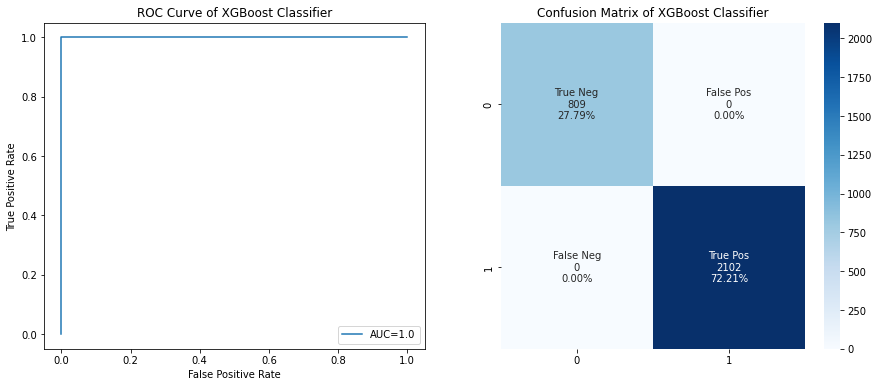


---------------------------------------------------------------------------------------------------
MODEL RESULT SUMMARY


,Model,Accuracy,F1 Score,Precision,Recall,AUC
0,Logistic Regression,1.000000,1.000000,1.000000,1.000000,1.000000
1,KNN,0.976984,0.983929,0.992259,0.975737,0.992391
2,SVM (Linear),1.000000,1.000000,1.000000,1.000000,1.000000
3,GaussianNB,1.000000,1.000000,1.000000,1.000000,1.000000
4,Decision Tree Classifier,1.000000,1.000000,1.000000,1.000000,1.000000
5,Random Forest,0.998282,0.998811,0.998573,0.999049,0.999261
6,XGBoost Classifier,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
create_complete_report(xg, "XGBoost Classifier")

## Multilayer Perceptron Classifier

In [ ]:
hidden_layers = [10, 100, 188, 1000] # 188 is the number of feature columns
for i in hidden_layers:
  mlp = MLPClassifier(hidden_layer_sizes=(i,), activation="relu", solver='sgd', random_state=1)
  mlp.fit(X_train_sc, y_train)
  y_pred = mlp.predict(X_test_sc)
  cm_forest = confusion_matrix(y_test, y_pred)
  print('hidden layers size = ', i)
  print(cm_forest)
  print('Accuracy: ',(accuracy_score(y_test, y_pred)))
  print('')

hidden layers size =  10
[[ 809    0]
 [   1 2101]]
Accuracy:  0.9996564754379939

hidden layers size =  100
[[ 809    0]
 [   0 2102]]
Accuracy:  1.0

hidden layers size =  188
[[ 809    0]
 [   0 2102]]
Accuracy:  1.0

hidden layers size =  1000
[[ 809    0]
 [   0 2102]]
Accuracy:  1.0



Minimum hidden layer size that gives maximum accuracy is 100. I chose 100 as the number of hidden layers to save computation resources.

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation="relu", solver='sgd', random_state=1)
mlp.fit(X_train_sc, y_train)
y_pred = mlp.predict(X_test_sc)
accuracy = (accuracy_score(y_test, y_pred))
print('Accuracy: ',round(accuracy*100,3),'%')

Accuracy:  100.0 %


CROSS VALIDATION
---------------------------------------------------------------------------------------------------
Accuracy of fold 0 1.0
Accuracy of fold 1 0.999
Accuracy of fold 2 1.0
Accuracy of fold 3 0.999
Accuracy of fold 4 1.0
Accuracy of fold 5 1.0
Accuracy of fold 6 1.0
Accuracy of fold 7 1.0
Accuracy of fold 8 1.0
Accuracy of fold 9 0.999
Mean Accuracy of Cross Validation: 99.97%
Standard Deviation: 0.04%
---------------------------------------------------------------------------------------------------

CLASSIFICATION REPORT
---------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       809
         1.0       1.00      1.00      1.00      2102

    accuracy                           1.00      2911
   macro avg       1.00      1.00      1.00      2911
weighted avg       1.00      1.00      1.00      2911

-----------------------------

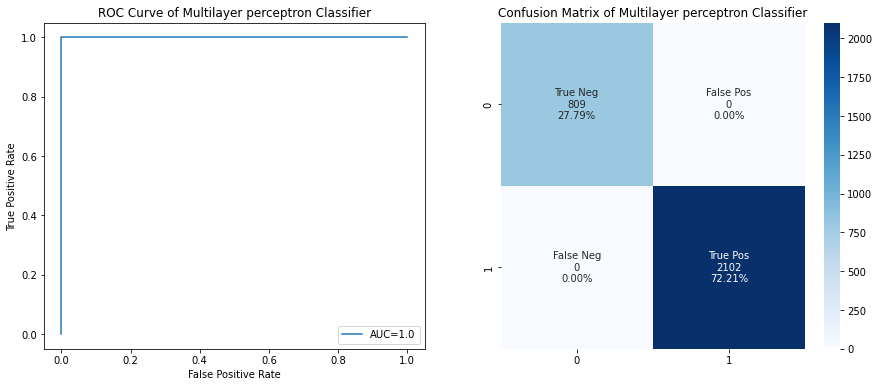


---------------------------------------------------------------------------------------------------
MODEL RESULT SUMMARY


,Model,Accuracy,F1 Score,Precision,Recall,AUC
0,Logistic Regression,1.000000,1.000000,1.000000,1.000000,1.000000
1,KNN,0.976984,0.983929,0.992259,0.975737,0.992391
2,SVM (Linear),1.000000,1.000000,1.000000,1.000000,1.000000
3,GaussianNB,1.000000,1.000000,1.000000,1.000000,1.000000
4,Decision Tree Classifier,1.000000,1.000000,1.000000,1.000000,1.000000
5,Random Forest,0.998282,0.998811,0.998573,0.999049,0.999261
6,XGBoost Classifier,1.000000,1.000000,1.000000,1.000000,1.000000
7,Multilayer perceptron Classifier,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
create_complete_report(mlp, "Multilayer perceptron Classifier")

## Visualize Models Metrics

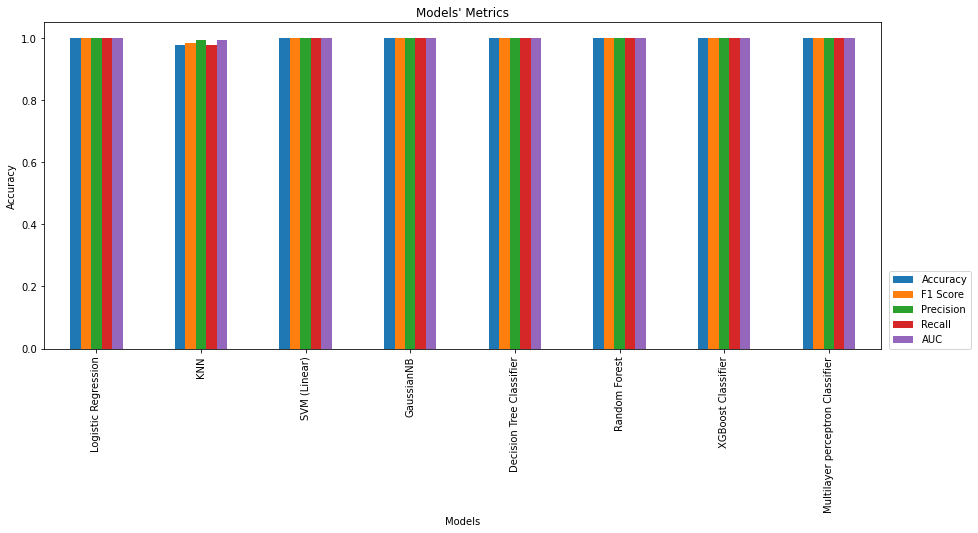

In [ ]:
pd.DataFrame(model_collection).plot(x="Model", y=["Accuracy", "F1 Score", 'Precision','Recall','AUC'], kind="bar", figsize=(15, 6))
plt.title("Models' Metrics")
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend(loc=(1.01,0))

In [ ]:
pd.DataFrame(model_collection)

,Model,Accuracy,F1 Score,Precision,Recall,AUC
0,Logistic Regression,1.000000,1.000000,1.000000,1.000000,1.000000
1,KNN,0.976984,0.983929,0.992259,0.975737,0.992391
2,SVM (Linear),1.000000,1.000000,1.000000,1.000000,1.000000
3,GaussianNB,1.000000,1.000000,1.000000,1.000000,1.000000
4,Decision Tree Classifier,1.000000,1.000000,1.000000,1.000000,1.000000
5,Random Forest,0.998282,0.998811,0.998573,0.999049,0.999261
6,XGBoost Classifier,1.000000,1.000000,1.000000,1.000000,1.000000
7,Multilayer perceptron Classifier,1.000000,1.000000,1.000000,1.000000,1.000000


# Discussion

> Logistic Regression, SVM, GaussianNB, Decision Tree, and XGBoost are the models that give 100% of accuracy from this dataset. Also, thier Mean Accuracies of Cross Validation are 100%.

> The "Multilayer Perceptron" Classifier report shows that Mean Accuracy of Cross Validation is less than other models above. So, to avoid life-threatening damage from 0.03% which means 3 patients from 10,000 patients, this model may not be the option for the prototype, for now.

> Therefore, to create prototype for this predictor, these models can be used to validate with other dataset in order to calibrate with each hospital or clinical practice.

> Since this dataset was retrieve from only one spec of ECG (according to https://www.physionet.org/content/ptbdb/1.0.0/ ECG specification), these model are needed to be calibrated to check if new inputs distribution shifted from the training dataset

> Note, again, that these model is only use to interpret Lead II.









In [ ]:
print("## Ratio Normal/Abnormal ##")
print(ptbdb_normal.shape[0]/ptbdb_abnormal.shape[0])
print(" ")
print("## Percent of a minority class ##")
print((ptbdb_normal.shape[0]/(ptbdb_abnormal.shape[0] + ptbdb_normal.shape[0]) * 100), " %")

## Ratio Normal/Abnormal ##
0.3851132686084142
 
## Percent of a minority class ##
27.80373831775701  %



> The dataset size ratio was 0.385 Normal/Abnormal, which is 27.8% of total size. It was a bit imbalanced, but no need to oversampling the data.

> According to the article https://towardsdatascience.com/smote-fdce2f605729, a metric "Accuracy" should not be used as a metric in case of imbalanced data. By doing SMOTE to balance the dataset, it will increase more prediction of the false positives, and reduce the false negatives. This means, increase "Recall", lower "Precision".

> However, in our case, the metrics show 100% of recall and precision. I think it just needs to be tested with other dataset to confirm its usability.


# Save Model

In [ ]:
import joblib
joblib.dump(xg, 'xgboost_classifier_LeadII_MI.pkl')

['xgboost_classifier_LeadII_MI.pkl']

# Test Model

In [ ]:
loaded_model = joblib.load('xgboost_classifier_LeadII_MI.pkl')

In [ ]:
loaded_model.predict(X_test_sc)[:25]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0])

In [ ]:
individual_neg = df.iloc[[df[df['Label'] == 0].index[54]], 1:].values
result = loaded_model.predict(sc.transform(individual_neg))
prob = loaded_model.predict_proba(sc.transform(individual_neg))
if result[0] == 0:
  print("MI Undetected from Lead II")
  print("Confidence Rate:", round(prob[0][np.argmax(prob[0])]*100, 3), '%')
else:
  print("MI detected from Lead II")
  print("Confidence Rate:", round(prob[0][np.argmax(prob[0])]*100, 3), '%')

MI Undetected from Lead II
Confidence Rate: 99.974 %


In [ ]:
individual_pos = df.iloc[[df[df['Label'] == 1].index[54]], 1:].values
result = loaded_model.predict(sc.transform(individual_pos))
prob = loaded_model.predict_proba(sc.transform(individual_neg))
if result[0] == 0:
  print("MI Undetected from Lead II")
  print("Confidence Rate:", round(prob[0][np.argmax(prob[0])]*100, 3), '%')
else:
  print("MI detected from Lead II")
  print("Confidence Rate:", round(prob[0][np.argmax(prob[0])]*100, 3), '%')

MI detected from Lead II
Confidence Rate: 99.974 %


In [ ]:
individual_pos = df.iloc[[df[df['Label'] == 1].index[74]], 1:].values
result = loaded_model.predict(sc.transform(individual_pos))
prob = loaded_model.predict_proba(sc.transform(individual_neg))
if result[0] == 0:
  print("MI Undetected from Lead II")
  print("Confidence Rate:", round(prob[0][np.argmax(prob[0])]*100, 3), '%')
else:
  print("MI detected from Lead II")
  print("Confidence Rate:", round(prob[0][np.argmax(prob[0])]*100, 3), '%')

MI detected from Lead II
Confidence Rate: 99.974 %


In [ ]:
individual_neg = df.iloc[[df[df['Label'] == 0].index[74]], 1:].values
result = loaded_model.predict(sc.transform(individual_neg))
prob = loaded_model.predict_proba(sc.transform(individual_neg))
if result[0] == 0:
  print("MI Undetected from Lead II")
  print("Confidence Rate:", round(prob[0][np.argmax(prob[0])]*100, 3), '%')
else:
  print("MI detected from Lead II")
  print("Confidence Rate:", round(prob[0][np.argmax(prob[0])]*100, 3), '%')

MI Undetected from Lead II
Confidence Rate: 99.969 %
